In [1]:
import plotly.express as px # EDA
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # EDA
from matplotlib import pyplot as plt # EDA
%matplotlib inline
from sklearn import preprocessing # to normalize labels.
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r"C:\Users\SALAH MAHMOUD\OneDrive\Desktop\شرح\titanic\train.csv")


# read data and clean it

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.drop(["Name","Embarked","Ticket","Fare"],axis = 1,inplace = True)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,male,22.0,1,0,NaN
1,2,1,1,female,38.0,1,0,C85
2,3,1,3,female,26.0,0,0,NaN
3,4,1,1,female,35.0,1,0,C123
4,5,0,3,male,35.0,0,0,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Cabin        204 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [8]:
df.drop(["Cabin"],axis = 1,inplace = True)

In [9]:
df["Age"].fillna(df["Age"].mean(),inplace = True)

In [10]:
np.transpose(df.describe())

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5,446.000000,668.5,891.0
Survived,891.0,0.383838,0.486592,0.00,0.0,0.000000,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.00,2.0,3.000000,3.0,3.0
Age,891.0,29.699118,13.002015,0.42,22.0,29.699118,35.0,80.0
SibSp,891.0,0.523008,1.102743,0.00,0.0,0.000000,1.0,8.0
Parch,891.0,0.381594,0.806057,0.00,0.0,0.000000,0.0,6.0


In [11]:
df["Sex"].replace({"male":1,"female":0},inplace = True)


# EDA

<AxesSubplot:>

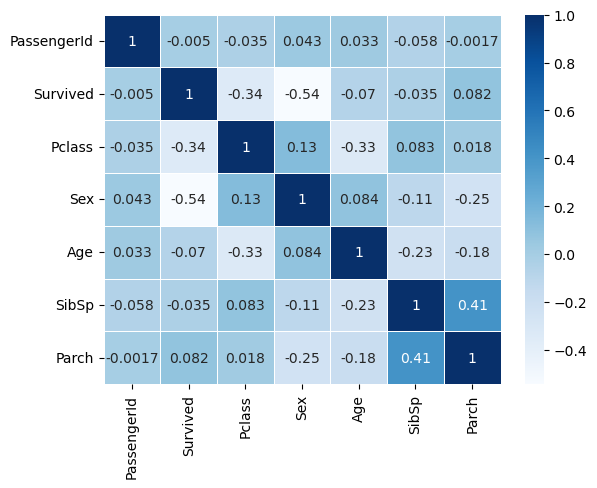

In [12]:
sns.heatmap(df.corr(),annot=True, cmap="Blues", linewidths=.5)

<AxesSubplot:xlabel='Sex', ylabel='count'>

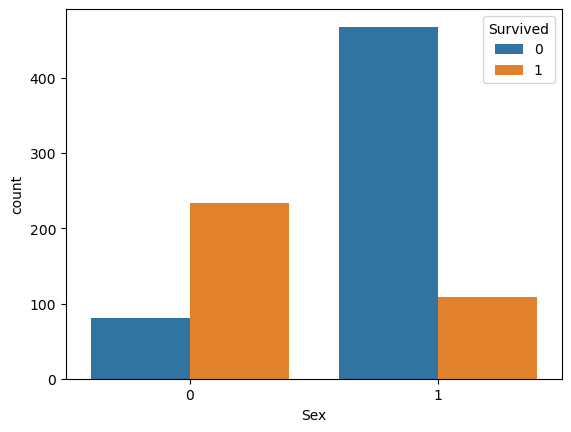

In [13]:
sns.countplot(x=df.Sex,hue = df.Survived)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

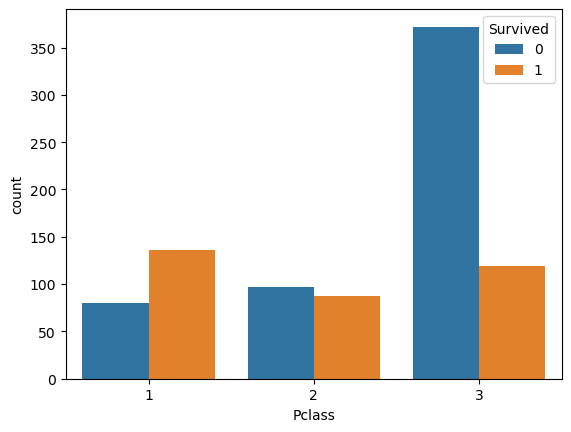

In [14]:
sns.countplot(x=df.Pclass,hue = df.Survived)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

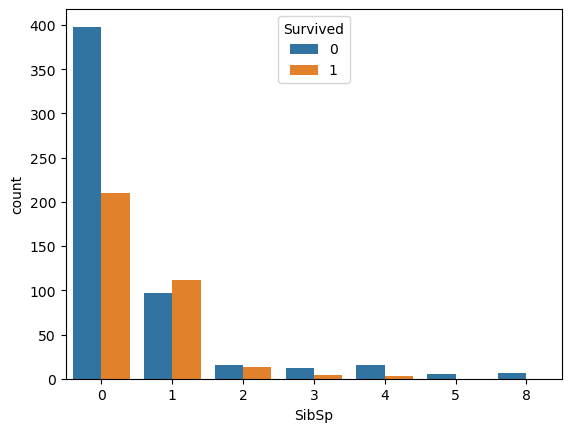

In [15]:
sns.countplot(x=df.SibSp,hue = df.Survived)

<AxesSubplot:xlabel='Parch', ylabel='count'>

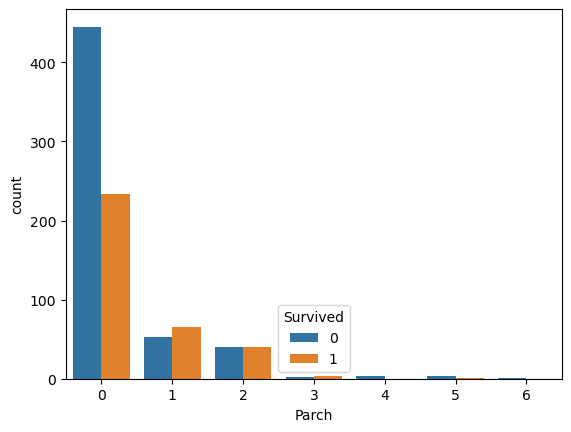

In [16]:
sns.countplot(x=df.Parch,hue = df.Survived)

<AxesSubplot:>

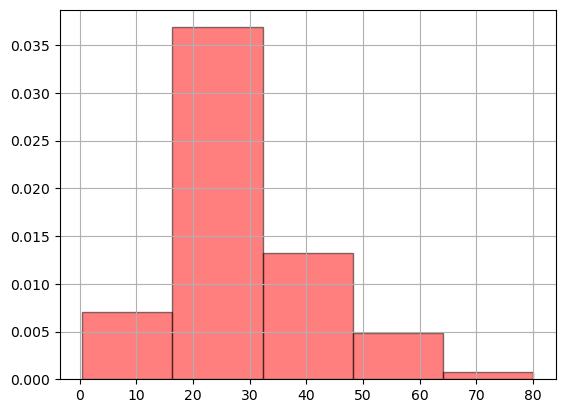

In [17]:

df.Age.hist(bins=5, alpha=0.5,density=True, histtype='bar', color='red', edgecolor='black')


In [18]:
pd.crosstab(df["Survived"], df["Sex"])

Sex,0,1
Survived,,
0,81,468
1,233,109


In [19]:
pd.crosstab(df["Survived"], df["Parch"])

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


In [20]:
pd.crosstab(df["Survived"], df["SibSp"])

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


In [21]:
pd.crosstab(df["Survived"], df["Pclass"])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


# Train and Spilit

In [22]:
x = df.drop("Survived",axis = 1).values
y = df.Survived
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\SALAH MAHMOUD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\SALAH MAHMOUD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

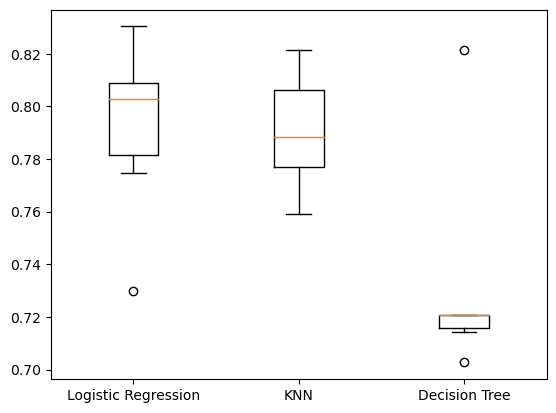

In [23]:
models = {"Logistic Regression": LogisticRegression(),
"KNN": KNeighborsClassifier(),
"Decision Tree": DecisionTreeClassifier()}
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()


In [24]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} train Set Accuracy: {}".format(name, train_score))
    print("{} Test Set Accuracy: {}".format(name, test_score))


Logistic Regression train Set Accuracy: 0.7919161676646707
Logistic Regression Test Set Accuracy: 0.8026905829596412
KNN train Set Accuracy: 0.8338323353293413
KNN Test Set Accuracy: 0.7892376681614349
Decision Tree train Set Accuracy: 1.0
Decision Tree Test Set Accuracy: 0.7354260089686099


C:\Users\SALAH MAHMOUD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\SALAH MAHMOUD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

# My model

In [25]:
logis = LogisticRegression(C=0.1, penalty='l2')
logis.fit(X_train_scaled, y_train)
train_score = logis.score(X_train_scaled, y_train)
test_score = logis.score(X_test_scaled, y_test)
print("train Set Accuracy: {}".format(train_score))
print("Test Set Accuracy: {}".format(test_score))

train Set Accuracy: 0.8008982035928144
Test Set Accuracy: 0.8071748878923767


In [26]:
 y_predict = logis.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.8071748878923767
